In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

plt.style.use('_mpl-gallery-nogrid')

figs_path = Path('/home/dev/master-thesis/tex/figs')

In [101]:
path = '/home/dev/master-thesis/documents/QnA_OSM.xlsx'

questions_df = pd.read_excel(path, sheet_name='Questions').dropna(how='all')
tests_df = pd.read_excel(path, sheet_name='Tests').dropna(how='all')
levels_df = pd.read_excel(path, sheet_name='Prompt Levels').dropna(how='all')
levels_tests_df = pd.read_excel(path, sheet_name='PL Tests').dropna(how='all')

In [102]:
questions_df.head()

,Query ID,Query,Correct Response,Steps,Difficulty
0,nidarosdomen_polygon_retrieval,Retrieve a polygon of Nidarosdomen.,Adding a polygon of Nidarosdomen to the map.,- Use the places_of_worship_polygons layer\n- ...,1
1,vestfold_bbox,Find the coordinates that define a the extent ...,Minimum longitude: 9.7553357\nMinimum latitude...,- Get the correct county outline from places_...,1
2,county_names,What are the names of the counties in found in...,"Nordland, Telemark, Troms, Rogaland, Vestland,...",- Get info about the 'places_polygons' dataset...,1
3,aker_brygge_national,Which is the clostest railway station to Aker ...,Nationalteateret,- Find Aker brygge in POI data\n- Find closest...,1
4,viken_dissolve,Combine the countries that correspond to the h...,"Display the outline of Viken, based on the out...",NaN,2


In [103]:
tests_df.head()

,Query ID,Agent Type,Outcome,Duration [s],Tokens,Cost [$],LangSmith Traces,Comments,Model
0,viken_dissolve,python,success,68.23,6099.0,0.06345,8876e65c-3de6-4a58-8275-130580f71a39,/home/dev/master-thesis/tex/figs/viken_dissolv...,gpt-4-0125-preview
1,viken_dissolve,sql,partial success,26.49,1447.0,0.01553,e438271a-3579-46a6-9b95-5709050f2bbc,/home/dev/master-thesis/tex/figs/viken_not_dis...,gpt-4-0125-preview
2,viken_dissolve,oaf,success,52.24,2336.0,0.03393,48dee0fd-f6c9-4e51-af48-a247347c24df,/home/dev/master-thesis/tex/figs/viken_dissolv...,gpt-4-0125-preview
3,oslo_residental_difference,sql,success,168.13,1944.0,0.02010,01881c33-7cae-4592-a282-d27ce9b77ade,/home/dev/master-thesis/tex/figs/oslo_ex_resid...,gpt-4-0125-preview
4,oslo_residental_difference,oaf,failure,119.39,2373.0,0.02467,768df9a1-fa8b-4098-860e-f74fbeaf0074,/home/dev/master-thesis/tex/figs/oslo_ex_resid...,gpt-4-0125-preview


In [104]:
levels_df.head()


,Query ID,Level,Type,Formulation
0,oslo_bergen_geodesic_novice,novice,normal,Please plot the shortest flight path on a map ...
1,oslo_bergen_geodesic_expert,expert,normal,Create a geodesic curve between the airports o...
2,oslo_bergen_geodesic_expert_sbs,expert,step-by-step,1. Get info on all potentially relevant datase...
3,oslo_roads_maxspeed_gte_70_kmh_novice,novice,normal,Draw roads in Oslo where you can drive at leas...
4,oslo_roads_maxspeed_gte_70_kmh_expert,expert,normal,Retrieve roads in Oslo that have speed limit g...


In [105]:
levels_tests_df= levels_tests_df.merge(levels_df, on='Query ID', how='left')
levels_tests_df.head()


,Query ID,Agent Type,Outcome,Duration [s],Tokens,Cost [$],LangSmith Traces,Comments,Model,Level,Type,Formulation
0,oslo_bergen_geodesic_novice,sql,failure,105.27,3166.0,0.0343,42f887d6-e241-45f4-84d2-63ec88ba497a,NaN,gpt-4-turbo-2024-04-09,novice,normal,Please plot the shortest flight path on a map ...
1,oslo_bergen_geodesic_novice,oaf,failure,NaN,NaN,NaN,c7206383-e1dd-4df4-ace2-e1e35d7edf7a,NaN,gpt-4-turbo-2024-04-09,novice,normal,Please plot the shortest flight path on a map ...
2,oslo_bergen_geodesic_novice,python,failure,NaN,NaN,NaN,f2b5578a-8a75-4533-ac97-7ffb4082becc,NaN,gpt-4-turbo-2024-04-09,novice,normal,Please plot the shortest flight path on a map ...
3,oslo_bergen_geodesic_expert_sbs,sql,failure,NaN,NaN,NaN,520bd384-3c44-4c3c-8134-54c596544ca2\na8af379b...,NaN,gpt-4-turbo-2024-04-09,expert,step-by-step,1. Get info on all potentially relevant datase...
4,oslo_bergen_geodesic_expert_sbs,oaf,failure,NaN,NaN,NaN,3703bd50-bb92-4bcf-8bae-f004a2e8000b,NaN,gpt-4-turbo-2024-04-09,expert,step-by-step,1. Get info on all potentially relevant datase...


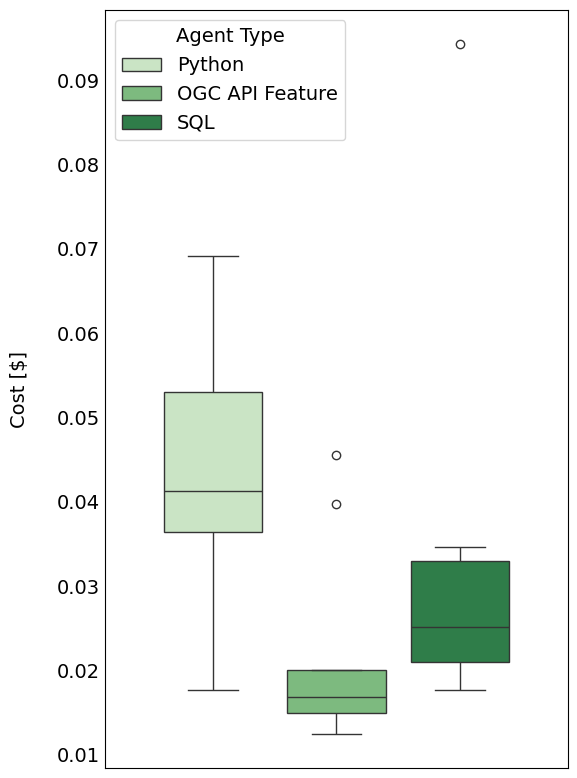

In [106]:
plt.rcParams.update({'font.size': 14}) 

fig, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(hue="Agent Type", y="Cost [$]",
            data=tests_df, palette="Greens", ax=ax, gap=.2)

padding = 20
ax.set_ylabel('Cost [$]', labelpad=padding)

legend_labels = ["Python", "OGC API Feature", "SQL"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(
    handles=handles, labels=legend_labels, title="Agent Type", loc="upper left")
plt.tight_layout()
plt.savefig(figs_path / 'cost_box_plot.png')
plt.show()

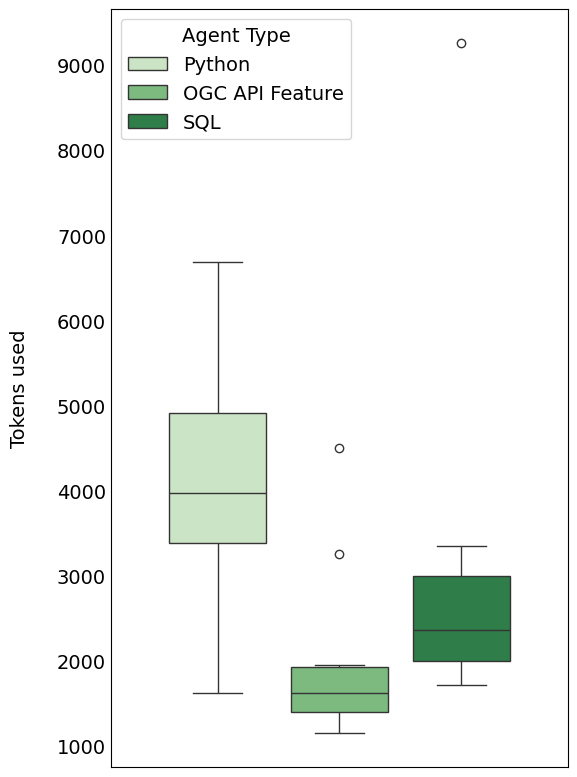

In [107]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(hue="Agent Type", y="Tokens",
            data=tests_df, palette="Greens", ax=ax, gap=.2)

padding = 20
ax.set_ylabel('Tokens used', labelpad=padding)

legend_labels = ["Python", "OGC API Feature", "SQL"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(
    handles=handles, labels=legend_labels, title="Agent Type", loc="upper left")
plt.tight_layout()
plt.savefig(figs_path / 'tokens_box_plot.png')
plt.show()

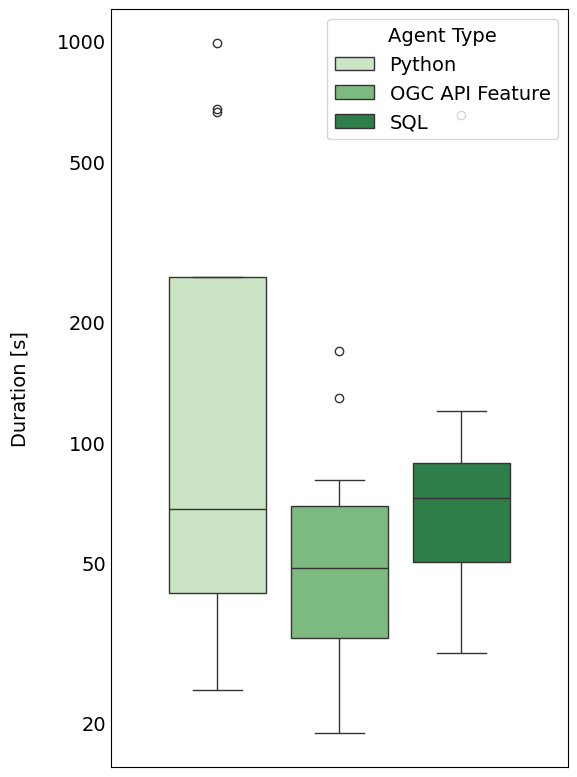

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(6, 8))

# Create the boxplot with log scale and spacing between the boxes
sns.boxplot(hue="Agent Type", y="Duration [s]", data=tests_df,
            palette="Greens", ax=ax, gap=.2)

# matplotlib.rcParams['xtick.minor.size'] = 0
# matplotlib.rcParams['xtick.minor.width'] = 0

ax.set_yscale('log')
ax.set_yticks([], minor=True)
ax.set_yticks([20, 50, 100, 200, 500, 1000])
ax.get_yaxis().set_major_formatter(ScalarFormatter())


legend_labels = ["Python", "OGC API Feature", "SQL"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=legend_labels,
           title="Agent Type", loc="upper right")

padding = 20
ax.set_ylabel('Duration [s]', labelpad=padding)

plt.tight_layout()
plt.savefig(figs_path / 'duration_box_plot.png')
plt.show()

  Agent Type  count
2        oaf      5
0     python      6
1        sql      9


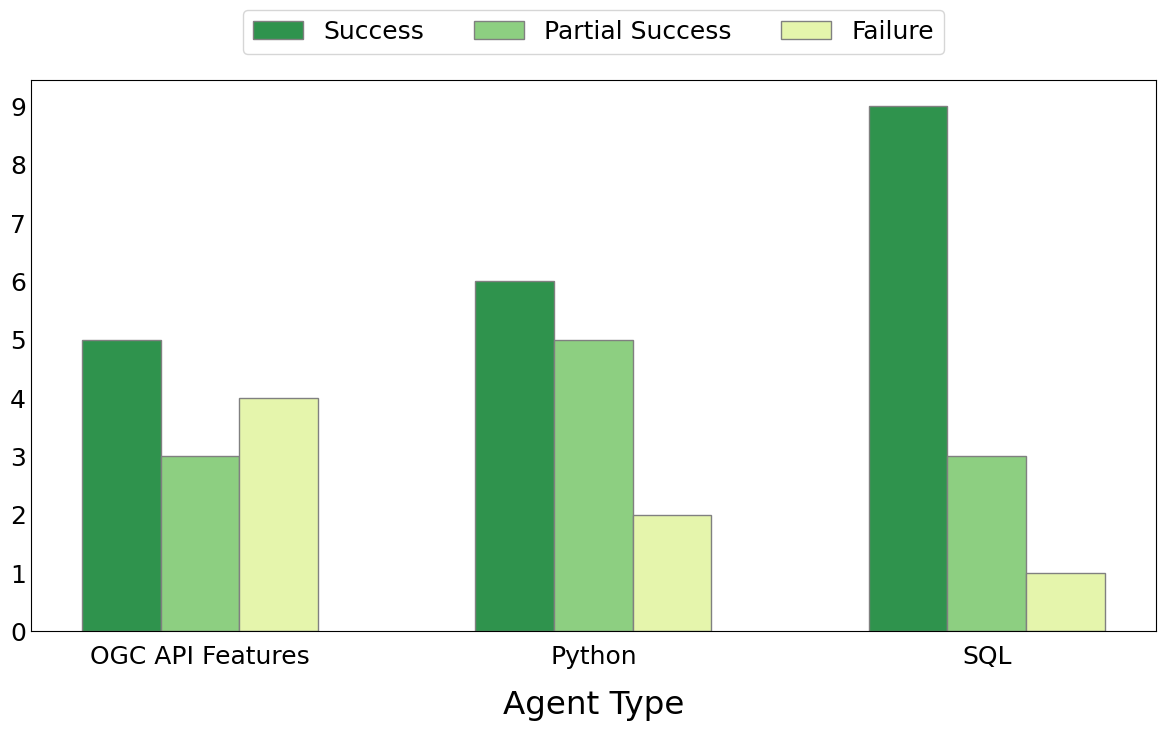

In [109]:
import numpy as np
import matplotlib.pyplot as plt

font_size = 18
plt.rcParams.update({'font.size': font_size})
barWidth = 0.2
fig = plt.subplots(figsize=(12, 8))

def counter(value):
    count_df = tests_df[tests_df['Outcome'] == value].groupby(
        'Agent Type').size().reset_index(name=f'count')
    all_agent_types = tests_df['Agent Type'].unique()
    count_df = count_df.set_index('Agent Type').reindex(
        all_agent_types, fill_value=0).reset_index()
    return count_df.sort_values(by='Agent Type')

success_count = counter('success')
partial_success_count = counter('partial success')
failure_count = counter('failure')

print(success_count)

br1 = np.arange(len(success_count))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

colors = plt.get_cmap('YlGn')(np.linspace(0.2, 0.7, 3))

plt.bar(br1, success_count['count'], color=colors[2], width=barWidth,
        edgecolor='grey', label='Success')
plt.bar(br2, partial_success_count['count'], color=colors[1], width=barWidth,
        edgecolor='grey', label='Partial Success')
plt.bar(br3, failure_count['count'], color=colors[0], width=barWidth,
        edgecolor='grey', label='Failure')

max_count = max(success_count['count'].max(),
                partial_success_count['count'].max(),
                failure_count['count'].max())
plt.xlabel('Agent Type', fontsize=font_size * 1.3, labelpad=15)
plt.yticks(range(int(max_count) + 1))
plt.xticks([r + barWidth for r in range(len(success_count))],
           ['OGC API Features', 'Python', 'SQL'])
plt.tick_params(axis='x', which='major', pad=10)


plt.legend(loc='upper center', bbox_to_anchor=(
    0.5, 1.15), fancybox=True, shadow=False, ncol=3)
plt.tight_layout()
plt.savefig(figs_path / 'outcome_distribution_bar_chart.png')
plt.show()

    Level  count
1  expert      3
0  novice      0


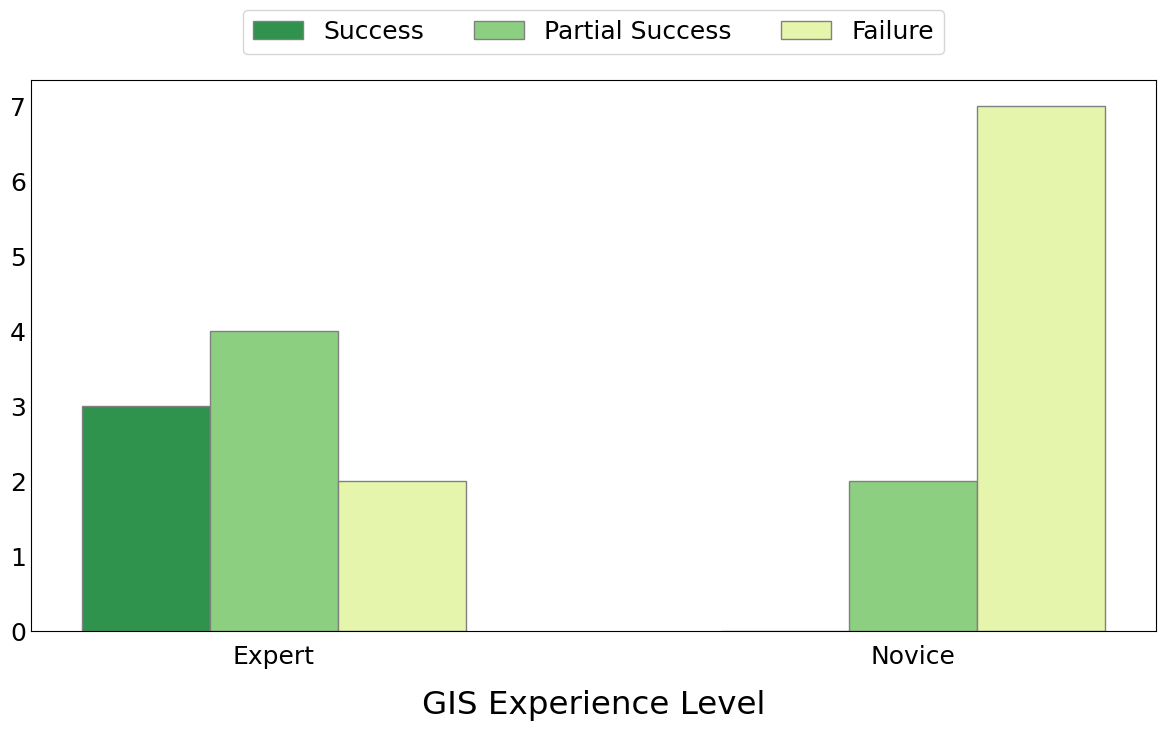

In [110]:
import numpy as np
import matplotlib.pyplot as plt

font_size = 18
plt.rcParams.update({'font.size': font_size})
barWidth = 0.2
fig = plt.subplots(figsize=(12, 8))


def counter2(df, value, groupby_col: str = 'Level'):
    count_df = df[df['Outcome'] == value].groupby(
        groupby_col).size().reset_index(name=f'count')
    all_agent_types = df[groupby_col].unique()
    count_df = count_df.set_index(groupby_col).reindex(
        all_agent_types, fill_value=0).reset_index()
    return count_df.sort_values(by=groupby_col)


success_count = counter2(levels_tests_df, 'success')
partial_success_count = counter2(levels_tests_df, 'partial success')
failure_count = counter2(levels_tests_df, 'failure')

print(success_count)

br1 = np.arange(len(success_count))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

colors = plt.get_cmap('YlGn')(np.linspace(0.2, 0.7, 3))

plt.bar(br1, success_count['count'], color=colors[2], width=barWidth,
        edgecolor='grey', label='Success')
plt.bar(br2, partial_success_count['count'], color=colors[1], width=barWidth,
        edgecolor='grey', label='Partial Success')
plt.bar(br3, failure_count['count'], color=colors[0], width=barWidth,
        edgecolor='grey', label='Failure')

max_count = max(success_count['count'].max(),
                partial_success_count['count'].max(),
                failure_count['count'].max())
plt.xlabel('GIS Experience Level', fontsize=font_size * 1.3, labelpad=15)
plt.yticks(range(int(max_count) + 1))
plt.xticks([r + barWidth for r in range(len(success_count))],
           ['Expert', 'Novice'])
plt.tick_params(axis='x', which='major', pad=10)


plt.legend(loc='upper center', bbox_to_anchor=(
    0.5, 1.15), fancybox=True, shadow=False, ncol=3)
plt.tight_layout()
plt.savefig(figs_path / 'levels_outcome_distribution_bar_chart.png')
plt.show()

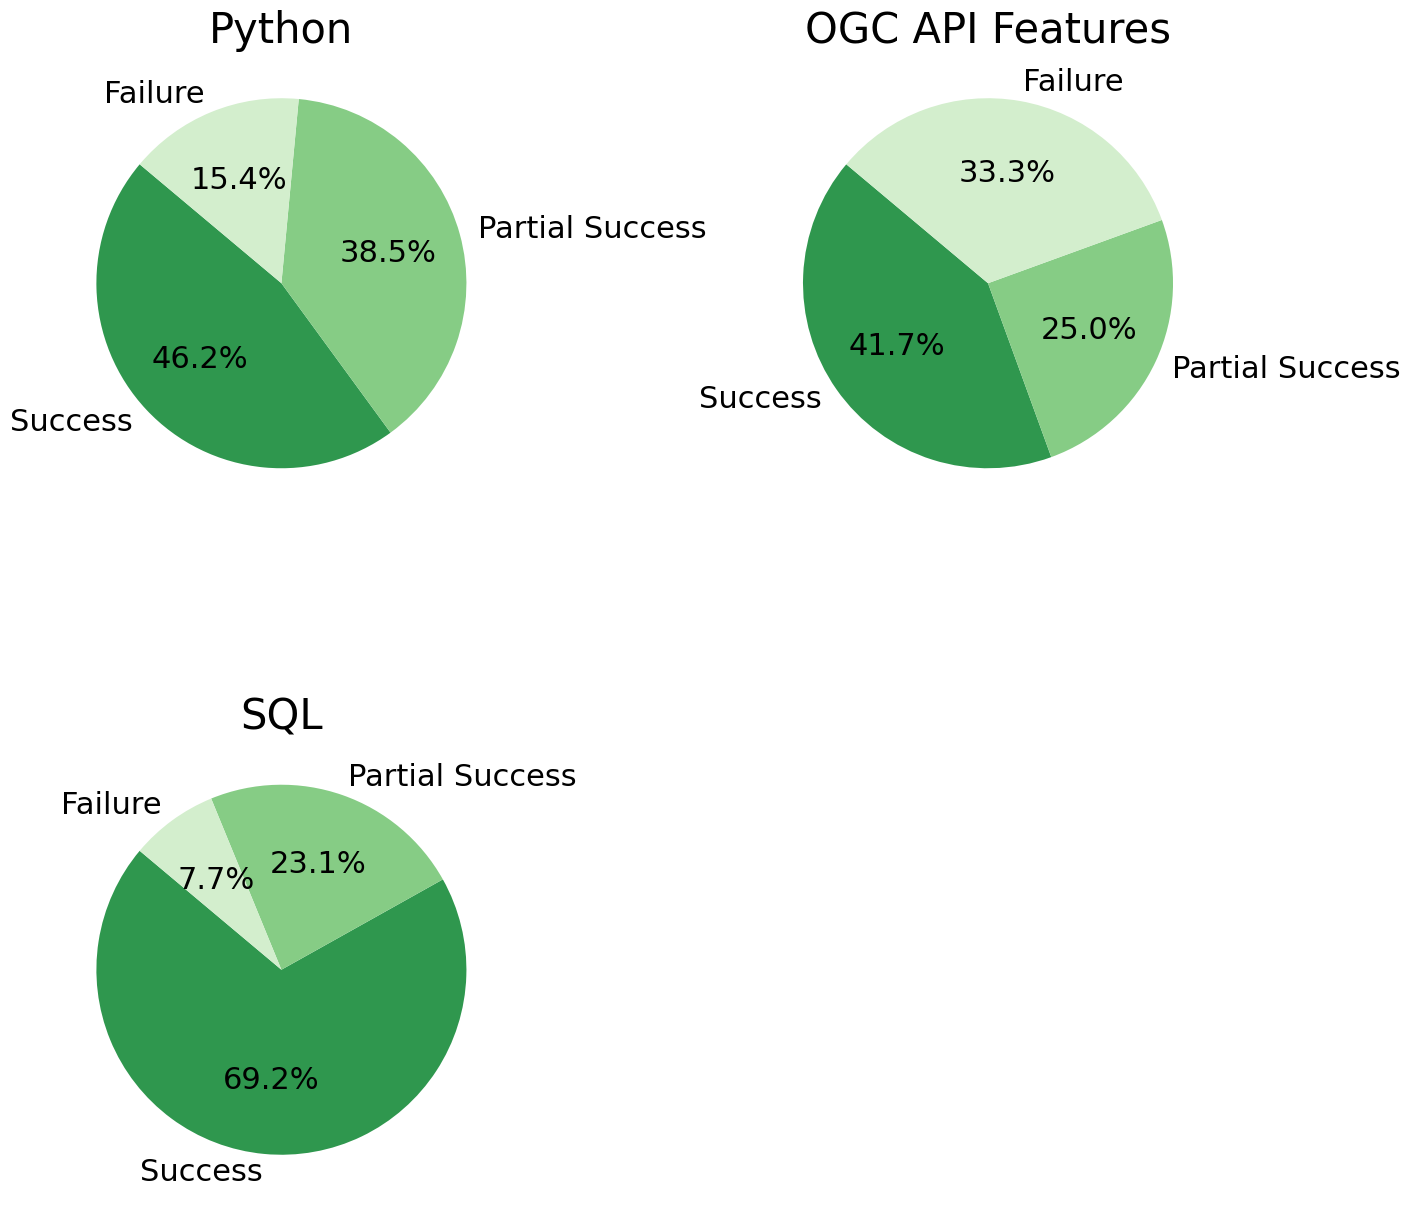

In [111]:
import matplotlib.pyplot as plt
import numpy as np

outcome_categories = ['success', 'partial success', 'failure']

df_python = tests_df[tests_df['Agent Type'] == 'python']
df_oaf = tests_df[tests_df['Agent Type'] == 'oaf']
df_sql = tests_df[tests_df['Agent Type'] == 'sql']

counts_python = df_python['Outcome'].value_counts()
counts_oaf = df_oaf['Outcome'].value_counts()
counts_sql = df_sql['Outcome'].value_counts()

counts_python = counts_python[counts_python.index.isin(outcome_categories)]
counts_oaf = counts_oaf[counts_oaf.index.isin(outcome_categories)]
counts_sql = counts_sql[counts_sql.index.isin(outcome_categories)]

labels = ['Success', 'Partial Success', 'Failure']

fig, axs = plt.subplots(2, 2, figsize=(14, 14))

colors = plt.get_cmap('Greens')(np.linspace(0.7, 0.2, 3))

# Flatten the axes array into a 1D array
axes_flat = axs.ravel()

for idx, ax in enumerate(axes_flat):
    if idx == 3:  # Skip the empty subplot
        ax.set_visible(False)
        continue

    i, j = divmod(idx, 2)  # Convert single index to row and column indices
    agent_type = ['Python', 'OGC API Features', 'SQL'][idx]
    counts = [counts_python, counts_oaf, counts_sql][idx]

    counts = counts.reindex(outcome_categories, fill_value=0)
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=140, colors=colors, textprops=dict(color="k", size=22))
    ax.set_aspect('equal')
    ax.set_title(agent_type, size=30)

plt.tight_layout()
plt.savefig(figs_path / 'outcome_distribution.png')
plt.show()